# Preliminary setting

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import miceforest as mf
from sklearn.impute import SimpleImputer
import missingno as msno
import seaborn as sns
sns.set()
from impyute.imputation.cs import mice
import plotly.express as px
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "notebook_connected"
import os
import cufflinks as cf
cf.go_offline(connected=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df_air = pd.read_csv("jantojun2020.csv")
df_covid  = pd.read_csv("us.csv")

C:\Users\mindt\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning:

Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.



# Preprocessing

### Preliminary analysis on data

In [3]:
df_air.shape

(2745847, 47)

In [4]:
df_air.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,ONT,...,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,ONT,...,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,ONT,...,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,ONT,...,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,ONT,...,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN


In [5]:
df_air.tail()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
2745842,2020,2,6,13,6,6/13/2020,AS,1209,N413AS,SEA,...,375.0,342.0,329.0,2677,11,NaN,NaN,NaN,NaN,NaN
2745843,2020,2,6,13,6,6/13/2020,AS,1216,N929VA,PHX,...,176.0,170.0,145.0,1107,5,NaN,NaN,NaN,NaN,NaN
2745844,2020,2,6,13,6,6/13/2020,AS,1217,N929VA,SEA,...,185.0,175.0,154.0,1107,5,NaN,NaN,NaN,NaN,NaN
2745845,2020,2,6,13,6,6/13/2020,AS,1223,N841VA,SNA,...,165.0,164.0,145.0,978,4,NaN,NaN,NaN,NaN,NaN
2745846,2020,2,6,13,6,6/13/2020,AS,1229,N413AS,HNL,...,338.0,338.0,316.0,2677,11,NaN,NaN,NaN,NaN,NaN


In [6]:
df_covid.shape

(476, 5)

In [7]:
df_covid.head()

,date,d_cases,d_deaths,c_cases,c_deaths
0,2020-01-21,1,0,1,0
1,2020-01-22,0,0,1,0
2,2020-01-23,0,0,1,0
3,2020-01-24,1,0,2,0
4,2020-01-25,1,0,3,0


In [8]:
df_covid.tail()

,date,d_cases,d_deaths,c_cases,c_deaths
471,2021-05-06,47664,830,32632099,579634
472,2021-05-07,47784,815,32679883,580449
473,2021-05-08,33789,607,32713672,581056
474,2021-05-09,22391,246,32736063,581302
475,2021-05-10,36451,367,32772514,581669


### Data type change

In [9]:
pd.set_option("display.max.columns", None)
df_air.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER_FL_NUM,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2020,1,1,1,3,1/1/2020,WN,5888,N951WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1810,1851.0,41.0,41.0,1.0,2.0,1800-1859,44.0,1935.0,2049.0,4.0,1945,2053.0,68.0,68.0,1.0,4.0,1900-1959,0,NaN,95.0,122.0,74.0,363,2,8.0,0.0,27.0,0.0,33.0
1,2020,1,1,1,3,1/1/2020,WN,6276,N467WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1150,1146.0,-4.0,0.0,0.0,-1.0,1100-1159,13.0,1159.0,1310.0,8.0,1320,1318.0,-2.0,0.0,0.0,-1.0,1300-1359,0,NaN,90.0,92.0,71.0,363,2,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,1,3,1/1/2020,WN,4598,N7885A,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,2020,2016.0,-4.0,0.0,0.0,-1.0,2000-2059,8.0,2024.0,2121.0,3.0,2130,2124.0,-6.0,0.0,0.0,-1.0,2100-2159,0,NaN,70.0,68.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,1,3,1/1/2020,WN,4761,N551WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,1340,1350.0,10.0,10.0,0.0,0.0,1300-1359,10.0,1400.0,1503.0,2.0,1455,1505.0,10.0,10.0,0.0,0.0,1400-1459,0,NaN,75.0,75.0,63.0,333,2,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,1,3,1/1/2020,WN,5162,N968WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,915,916.0,1.0,1.0,0.0,0.0,0900-0959,6.0,922.0,1019.0,4.0,1035,1023.0,-12.0,0.0,0.0,-1.0,1000-1059,0,NaN,80.0,67.0,57.0,333,2,NaN,NaN,NaN,NaN,NaN


In [10]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745847 entries, 0 to 2745846
Data columns (total 47 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   QUARTER              int64  
 2   MONTH                int64  
 3   DAY_OF_MONTH         int64  
 4   DAY_OF_WEEK          int64  
 5   FL_DATE              object 
 6   MKT_UNIQUE_CARRIER   object 
 7   MKT_CARRIER_FL_NUM   int64  
 8   TAIL_NUM             object 
 9   ORIGIN               object 
 10  ORIGIN_CITY_NAME     object 
 11  ORIGIN_STATE_ABR     object 
 12  ORIGIN_STATE_NM      object 
 13  DEST                 object 
 14  DEST_CITY_NAME       object 
 15  DEST_STATE_ABR       object 
 16  DEST_STATE_NM        object 
 17  CRS_DEP_TIME         int64  
 18  DEP_TIME             float64
 19  DEP_DELAY            float64
 20  DEP_DELAY_NEW        float64
 21  DEP_DEL15            float64
 22  DEP_DELAY_GROUP      float64
 23  DEP_TIME_BLK         object 
 24

In [11]:
df_air['FL_DATE'] = pd.to_datetime(df_air.FL_DATE)
df_covid['date'] = pd.to_datetime(df_covid.date)

df_air['DATE'] = df_air['FL_DATE'].dt.strftime('%m/%d/%Y')
df_covid['DATE'] = df_covid['date'].dt.strftime('%m/%d/%Y')

In [12]:
df_covid.head()

,date,d_cases,d_deaths,c_cases,c_deaths,DATE
0,2020-01-21,1,0,1,0,01/21/2020
1,2020-01-22,0,0,1,0,01/22/2020
2,2020-01-23,0,0,1,0,01/23/2020
3,2020-01-24,1,0,2,0,01/24/2020
4,2020-01-25,1,0,3,0,01/25/2020


In [13]:
df_covid.tail()

,date,d_cases,d_deaths,c_cases,c_deaths,DATE
471,2021-05-06,47664,830,32632099,579634,05/06/2021
472,2021-05-07,47784,815,32679883,580449,05/07/2021
473,2021-05-08,33789,607,32713672,581056,05/08/2021
474,2021-05-09,22391,246,32736063,581302,05/09/2021
475,2021-05-10,36451,367,32772514,581669,05/10/2021


### Data merge

In [14]:
# key: date
df_air.rename(columns = {'FL_DATE':'DATE'})
df_main = pd.merge(df_air, df_covid, how='left', on='DATE')
pd.set_option("display.max.columns", None)

## preprocess (2 - merged dataset)

### Subset choice

In [15]:
# Column drop
df = df_main[['DATE','MONTH', 'd_cases', 'd_deaths', \
             'MKT_UNIQUE_CARRIER','MKT_CARRIER_FL_NUM', 'TAIL_NUM',\
             'ORIGIN_CITY_NAME','ORIGIN_STATE_NM','DEST_CITY_NAME', 'DEST_STATE_NM',\
             'DEP_TIME','DEP_DELAY','DEP_DEL15','ARR_TIME','ARR_DELAY','ARR_DEL15',\
             'CANCELLED','CANCELLATION_CODE','AIR_TIME','DISTANCE']]
df2 = df_main[['DATE','MONTH','d_cases','d_deaths','MKT_UNIQUE_CARRIER','ORIGIN_CITY_NAME',\
         'ORIGIN_STATE_NM','DEST_CITY_NAME','DEST_STATE_NM','DEP_DEL15','ARR_DEL15',\
         'CANCELLED','CANCELLATION_CODE','DISTANCE_GROUP']]
df2.head()

,DATE,MONTH,d_cases,d_deaths,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_NM,DEP_DEL15,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DISTANCE_GROUP
0,01/01/2020,1,NaN,NaN,WN,"Ontario, CA",California,"San Francisco, CA",California,1.0,1.0,0,NaN,2
1,01/01/2020,1,NaN,NaN,WN,"Ontario, CA",California,"San Francisco, CA",California,0.0,0.0,0,NaN,2
2,01/01/2020,1,NaN,NaN,WN,"Ontario, CA",California,"San Jose, CA",California,0.0,0.0,0,NaN,2
3,01/01/2020,1,NaN,NaN,WN,"Ontario, CA",California,"San Jose, CA",California,0.0,0.0,0,NaN,2
4,01/01/2020,1,NaN,NaN,WN,"Ontario, CA",California,"San Jose, CA",California,0.0,0.0,0,NaN,2


In [17]:
col_info = pd.DataFrame(df2.dtypes).T.rename(index={0:'column type'})
col_info = col_info.append(pd.DataFrame(df2.isnull().sum()).T.rename(index={0:'null values (nb)'}))
col_info = col_info.append(pd.DataFrame(df2.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
col_info

,DATE,MONTH,d_cases,d_deaths,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_NM,DEP_DEL15,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DISTANCE_GROUP
column type,object,int64,float64,float64,object,object,object,object,object,float64,float64,int64,object,int64
null values (nb),0,0,424439,424439,0,0,0,0,0,281992,287334,0,2462921,0
null values (%),0,0,15.4575,15.4575,0,0,0,0,0,10.2698,10.4643,0,89.6962,0


### NA processing

In [18]:
#df2['CANCELLED'] = df2['CANCELLED'].astype('category')

col_info = pd.DataFrame(df2.dtypes).T.rename(index={0:'column type'})
col_info = col_info.append(pd.DataFrame(df2.isnull().sum()).T.rename(index={0:'null values (nb)'}))
col_info = col_info.append(pd.DataFrame(df2.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
col_info

,DATE,MONTH,d_cases,d_deaths,MKT_UNIQUE_CARRIER,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_CITY_NAME,DEST_STATE_NM,DEP_DEL15,ARR_DEL15,CANCELLED,CANCELLATION_CODE,DISTANCE_GROUP
column type,object,int64,float64,float64,object,object,object,object,object,float64,float64,int64,object,int64
null values (nb),0,0,424439,424439,0,0,0,0,0,281992,287334,0,2462921,0
null values (%),0,0,15.4575,15.4575,0,0,0,0,0,10.2698,10.4643,0,89.6962,0


NA process

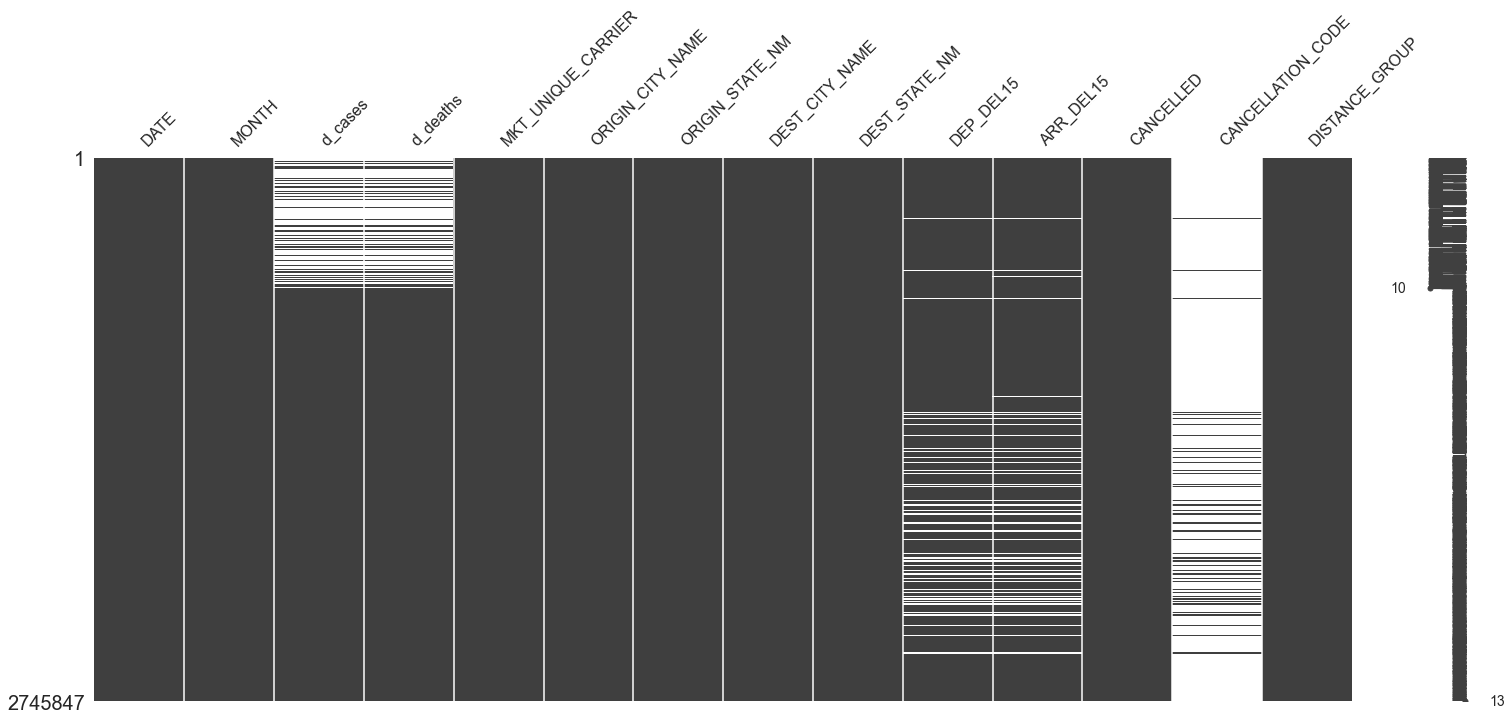

In [19]:
msno.matrix(df2)
plt.show()

In [21]:
df2['d_cases'] = df2['d_cases'].fillna(0)
df2['d_deaths'] = df2['d_deaths'].fillna(0)

df2['DEP_DEL15'] = df2['DEP_DEL15'].fillna(0)
df2['ARR_DEL15'] = df2['ARR_DEL15'].fillna(0)

df2['CANCELLATION_CODE'] = df2['CANCELLATION_CODE'].fillna('NA')

df2.isnull().sum()

DATE                  0
MONTH                 0
d_cases               0
d_deaths              0
MKT_UNIQUE_CARRIER    0
ORIGIN_CITY_NAME      0
ORIGIN_STATE_NM       0
DEST_CITY_NAME        0
DEST_STATE_NM         0
DEP_DEL15             0
ARR_DEL15             0
CANCELLED             0
CANCELLATION_CODE     0
DISTANCE_GROUP        0
dtype: int64

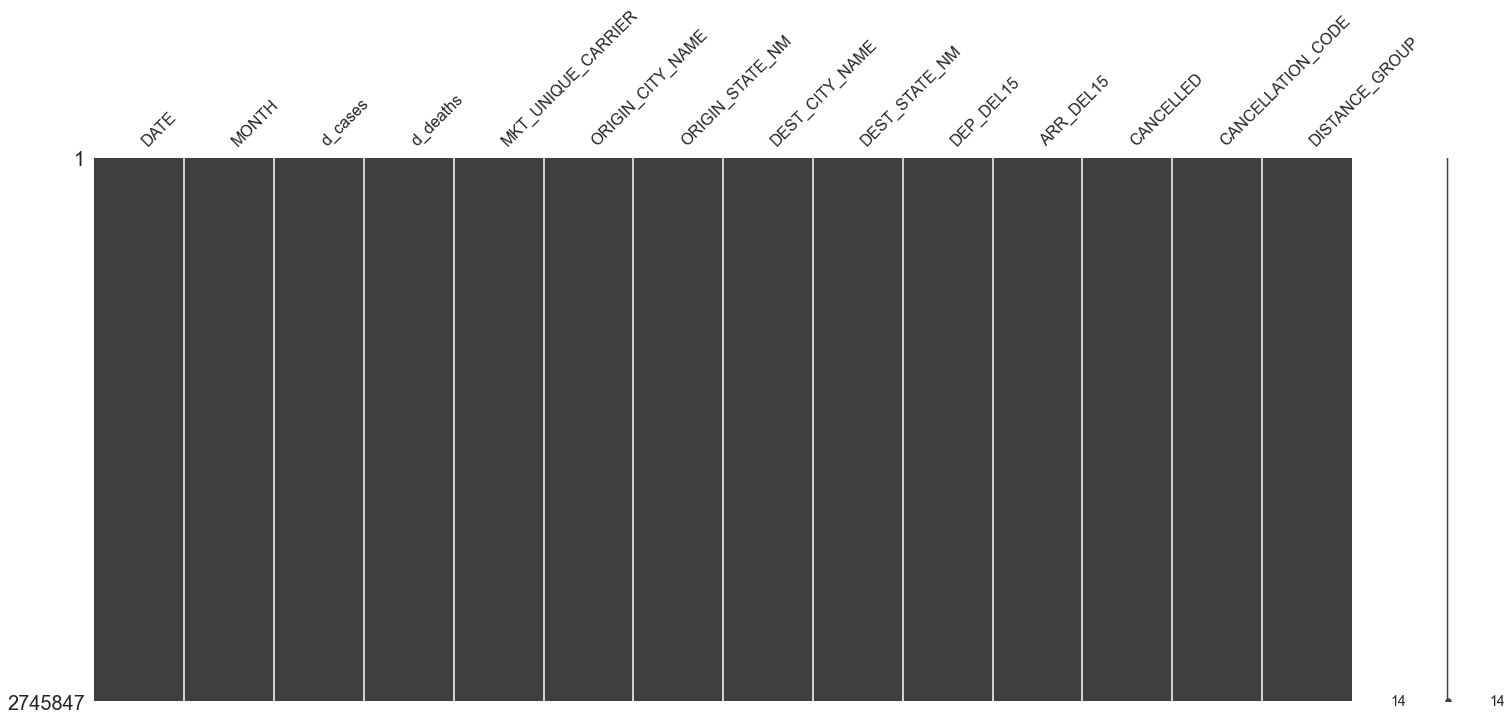

In [22]:
msno.matrix(df2)
plt.show()

In [23]:
df2.isnull().sum()

DATE                  0
MONTH                 0
d_cases               0
d_deaths              0
MKT_UNIQUE_CARRIER    0
ORIGIN_CITY_NAME      0
ORIGIN_STATE_NM       0
DEST_CITY_NAME        0
DEST_STATE_NM         0
DEP_DEL15             0
ARR_DEL15             0
CANCELLED             0
CANCELLATION_CODE     0
DISTANCE_GROUP        0
dtype: int64

In [24]:
# data type (date)
if 'DATE' in df2.columns:
    df2['DATE'] = pd.to_datetime(df2['DATE'])
#df2['CANCELLATION_CODE'] = df2['CANCELLATION_CODE'].astype('category')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745847 entries, 0 to 2745846
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DATE                datetime64[ns]
 1   MONTH               int64         
 2   d_cases             float64       
 3   d_deaths            float64       
 4   MKT_UNIQUE_CARRIER  object        
 5   ORIGIN_CITY_NAME    object        
 6   ORIGIN_STATE_NM     object        
 7   DEST_CITY_NAME      object        
 8   DEST_STATE_NM       object        
 9   DEP_DEL15           float64       
 10  ARR_DEL15           float64       
 11  CANCELLED           int64         
 12  CANCELLATION_CODE   object        
 13  DISTANCE_GROUP      int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 314.2+ MB


### Data description

Date: date \

d_cases: number of daily cases (COVID-19) \

d_deaths: number of daily deaths toll (COVID-19) \

MKT_UNIQUE_CARRIER: Airline Carrier Code \

ORIGIN_CITY_NAME: Flight Departure City, State Names \

ORIGIN_STATE_NM: Flight Departure State Name \

DEST_CITY_NAME: Flight Arrival City, State Names \

DEST_STATE_NM: Flight Arrival State Name \

DEP_DEL15: Departure Delay Greater Than 15 Minutes (0: Not Greater Than 15, 1: Greater Than 15) \

ARR_DEL15: Arrival Delay Greater Than 15 Minutes (0: Not Greater Than 15, 1: Greater Than 15) \

CANCELLED: 0: Flight Not Cancelled, 1: Flight Cancelled \

CANCELLATION_CODE: Reason for Cancellation - if Cancelled, Letter Present (A: Carrier, B: Weather, C: National Aviation System, D: Security) \

AIR_TIME: Actual Total Elapsed Time Airplane in the Air (in Minutes) \

DISTANCE: Distance Between Departure and Arrival Airports (in Miles)

# Preliminary analysis

In [25]:
pd.options.plotting.backend='plotly'

### Times series (booked flights)

In [26]:
# Total flight numbers
booked = df2.groupby(["DATE"])["CANCELLED"].count()
booked.plot()

### time series (flight cancellation)

In [27]:
# Flight cancellation trend
cancelled = df2[df2['CANCELLED'] == 1].groupby(["DATE"])["CANCELLED"].count()
cancelled.plot()

In [28]:
booked = pd.DataFrame(booked)
booked.rename(columns={'CANCELLED':'Booked'}, inplace = True)

cancelled = pd.DataFrame(cancelled)
cancelled.rename(columns={'CANCELLED': 'Cancelled'}, inplace = True)

In [29]:
fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02,
    row_heights = [0.7, 0.3], )
 
fig.add_trace(go.Line(x=booked.index, y=booked.Booked, name="Number of flight booking"), row=1, col=1)
fig.add_trace(go.Bar(x=cancelled.index, y=cancelled.Cancelled, name="Number of cancellation"), row=2, col=1)
 
fig.update_layout(height=326*2, width=350*3)
 
fig.show()


C:\Users\mindt\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [30]:
# Average number of daily flights in Jan - Feb
avg_fl = df2[(df2["MONTH"] <= 2)].groupby(["DATE"])["CANCELLED"].count().mean()
avg_fl

21394.316666666666

In [31]:
# Average number of flights in Jan - Feb
avg_can = df2[(df2["MONTH"] <= 2) & (df2["CANCELLED"] == 1)].groupby(["DATE"])["CANCELLED"].count().mean()
avg_can

241.85

In [32]:
# Average number of cancellation rate in Jan - Feb
avg_can/avg_fl*100

1.1304404051231673

In [33]:
# Average number of flights in Mar-Apr
avg_fl2 = df2[(df2["MONTH"] >= 3) & (df2["MONTH"] <= 4)].groupby(["DATE"])["CANCELLED"].count().mean()
avg_fl2

16926.426229508197

In [34]:
# Average number of flights in Mar - Apr
avg_can2 = df2[(df2["MONTH"] >= 3) & (df2["MONTH"] <= 4) & (df2["CANCELLED"] == 1)].groupby(["DATE"])["CANCELLED"].count().mean()
avg_can2

4182.360655737705

In [35]:
# Average number of cancellation rate in Mar - Apr
avg_can2/avg_fl2*100

24.70905907146842

In [36]:
# Average daily flights in May
avg_may = df2[(df2["MONTH"] == 5)].groupby(["DATE"])["CANCELLED"].count().mean()
# Decreased daily flights (rate) comparing Jan/Feb vs. May
(1-(avg_may/avg_fl)) * 100

70.98837599544387

### Covid time series

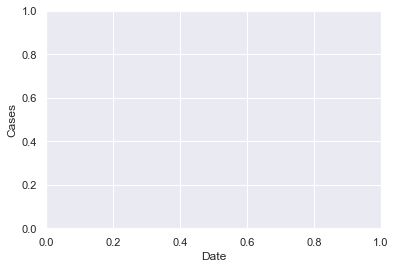

In [41]:
# Trends: number of cnases
df2.plot(x='DATE', y='d_cases')
plt.xlabel('Date')
plt.ylabel('Cases')
#plt.gca().get_legend().remove()
plt.rcParams['figure.figsize'] = [7, 5]

#plt.savefig('fig2.png')

In [ ]:
# Trends: number of deaths
df2.plot(x='DATE', y='d_deaths')
plt.rcParams['figure.figsize'] = [8, 5]
plt.gca().get_legend().remove()
plt.xlabel('Date')
plt.ylabel('Deaths')

### Correlation analysis

<AxesSubplot:>

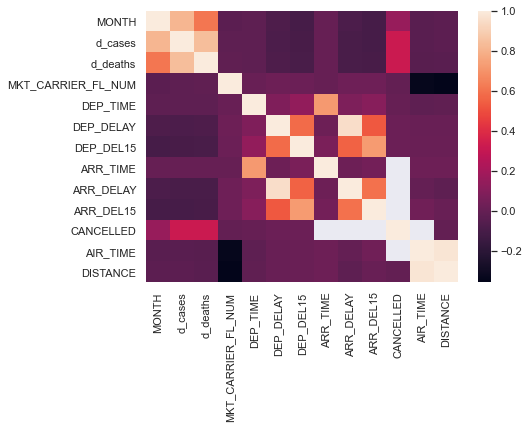

In [43]:
sns.heatmap(df.corr())

In [44]:
df2.loc[:,['d_cases', 'd_deaths', 'CANCELLED']].describe()

,d_cases,d_deaths,CANCELLED
count,2.745847e+06,2.745847e+06,2.745847e+06
mean,9.264497e+03,4.196600e+02,1.030378e-01
std,1.286803e+04,7.072591e+02,3.040083e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.600000e+01,3.000000e+00,0.000000e+00
75%,2.146900e+04,6.500000e+02,0.000000e+00
max,4.838900e+04,2.752000e+03,1.000000e+00


### K-means clustering (Airlines)

This part intends to analyze if the distance of flights are correlated to cancellation rates.

In [45]:
kmeans = df_main[["MKT_UNIQUE_CARRIER", "ORIGIN_CITY_NAME", "ORIGIN_STATE_NM", "DEST_CITY_NAME", \
              "DEST_STATE_NM", "AIR_TIME", "DISTANCE", "DISTANCE_GROUP"]]
kmeans.index = kmeans["MKT_UNIQUE_CARRIER"]
kmeans = kmeans[["DISTANCE"]]

kmeans

,DISTANCE
MKT_UNIQUE_CARRIER,
WN,363
WN,363
WN,333
WN,333
WN,333
...,...
AS,2677
AS,1107
AS,1107


In [46]:
col_info = pd.DataFrame(kmeans.dtypes).T.rename(index={0:'column type'})
col_info = col_info.append(pd.DataFrame(kmeans.isnull().sum()).T.rename(index={0:'null values (nb)'}))
col_info = col_info.append(pd.DataFrame(kmeans.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
col_info

,DISTANCE
column type,int64
null values (nb),0
null values (%),0


In [47]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(kmeans)
scaled

array([[0.06592973],
       [0.06592973],
       [0.0600079 ],
       ...,
       [0.21279116],
       [0.18732728],
       [0.52270036]])

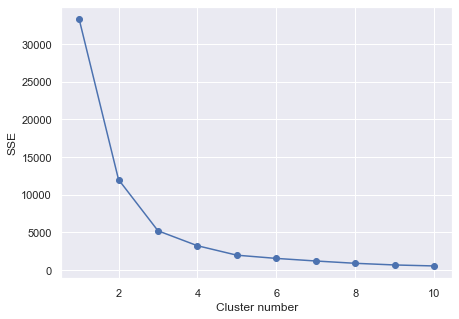

In [48]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker = 'o')
    plt.xlabel('Cluster number')
    plt.ylabel('SSE')
    plt.show()

elbow(scaled)

In [49]:
result = KMeans(n_clusters = 3, init = 'k-means++')
result.fit(kmeans)

KMeans(n_clusters=3)

In [50]:
result

KMeans(n_clusters=3)

In [53]:
df3 = df2
df3["DISTANCE_GROUP"] = result.labels_
df3["DISTANCE"] = df_main["DISTANCE"]

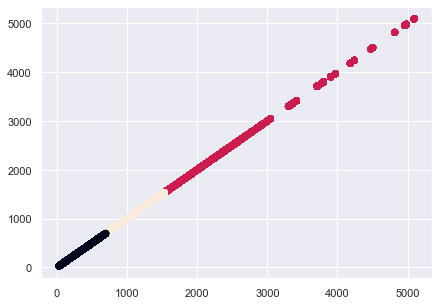

In [52]:
plt.scatter(df3["DISTANCE"], df3["DISTANCE"], c=df3["DISTANCE_GROUP"])
plt.show()

### Cluster analysis

In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745847 entries, 0 to 2745846
Data columns (total 15 columns):
 #   Column              Dtype         
---  ------              -----         
 0   DATE                datetime64[ns]
 1   MONTH               int64         
 2   d_cases             float64       
 3   d_deaths            float64       
 4   MKT_UNIQUE_CARRIER  object        
 5   ORIGIN_CITY_NAME    object        
 6   ORIGIN_STATE_NM     object        
 7   DEST_CITY_NAME      object        
 8   DEST_STATE_NM       object        
 9   DEP_DEL15           float64       
 10  ARR_DEL15           float64       
 11  CANCELLED           int64         
 12  CANCELLATION_CODE   object        
 13  DISTANCE_GROUP      int32         
 14  DISTANCE            int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(6)
memory usage: 324.7+ MB


In [55]:
df3[df3["DISTANCE_GROUP"] == 0].describe()

,MONTH,d_cases,d_deaths,DEP_DEL15,ARR_DEL15,CANCELLED,DISTANCE_GROUP,DISTANCE
count,1.582512e+06,1.582512e+06,1.582512e+06,1.582512e+06,1.582512e+06,1.582512e+06,1582512.0,1.582512e+06
mean,2.828576e+00,9.423241e+03,4.335290e+02,9.510070e-02,9.894838e-02,1.041237e-01,0.0,3.891474e+02
std,1.534337e+00,1.292096e+04,7.189969e+02,2.933541e-01,2.985928e-01,3.054210e-01,0.0,1.693341e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.900000e+01
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,2.470000e+02
50%,3.000000e+00,6.700000e+01,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,3.860000e+02
75%,4.000000e+00,2.146900e+04,6.980000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.340000e+02
max,6.000000e+00,4.838900e+04,2.752000e+03,1.000000e+00,1.000000e+00,1.000000e+00,0.0,7.040000e+02


In [56]:
df3[df3["DISTANCE_GROUP"] == 0]["DISTANCE"].mean()

389.1473802410345

In [57]:
df3[df3["DISTANCE_GROUP"] == 1]["DISTANCE"].mean()

2086.3522192889195

In [58]:
df3[df3["DISTANCE_GROUP"] == 2]["DISTANCE"].mean()

1020.0093696968634

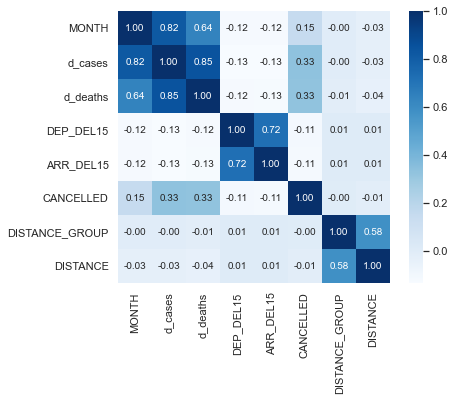

In [59]:
corr = df3.corr(method="pearson")
theat = sns.heatmap(corr, cbar = True, annot = True, annot_kws = {'size': 10}, \
                        fmt = '.2f', square = True, cmap = 'Blues')

In [60]:
# cancellation rate by distance group
dist_group = df3[(df["CANCELLED"] == 1) & (df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["DISTANCE_GROUP"])["CANCELLED"].count() / \
df3[(df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["DISTANCE_GROUP"])["CANCELLED"].count() * 100

pd.DataFrame(dist_group)

,CANCELLED
DISTANCE_GROUP,
0,24.690084
1,23.742209
2,25.003678


### Cancellation rate by flight origin

In [61]:
can_origin_rate = df2[(df["CANCELLED"] == 1) & (df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["ORIGIN_STATE_NM"])["CANCELLED"].count() / \
df2[(df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["ORIGIN_STATE_NM"])["CANCELLED"].count() * 100
pd.DataFrame(can_origin_rate)

,CANCELLED
ORIGIN_STATE_NM,
Alabama,24.397333
Alaska,6.308851
Arizona,24.690882
Arkansas,24.225905
California,25.496608
Colorado,26.421165
Connecticut,24.954885
Florida,24.924051
Georgia,23.322954


### cancellation rate by destination

In [62]:
can_dest_rate = df2[(df["CANCELLED"] == 1) & (df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["DEST_STATE_NM"])["CANCELLED"].count() / \
df2[(df3["MONTH"] >= 3) & (df3["MONTH"] <= 4)].groupby(["DEST_STATE_NM"])["CANCELLED"].count() * 100
can_dest_rate

can_dest_rate = pd.DataFrame(can_dest_rate)
can_dest_rate

,CANCELLED
DEST_STATE_NM,
Alabama,24.888889
Alaska,6.314797
Arizona,24.594959
Arkansas,24.499565
California,25.548992
Colorado,26.385066
Connecticut,25.058125
Florida,24.934086
Georgia,23.234727


### Data for ARIMA

In [63]:
# data
df5 = pd.DataFrame(df2[(df["CANCELLED"] == 1)].groupby(["DATE"])["DATE"].count())
df5 = df5.rename(columns={'DATE': 'CANCELLATION'})
df5 = df5.reset_index()
df5

,DATE,CANCELLATION
0,2020-01-01,145
1,2020-01-02,112
2,2020-01-03,141
3,2020-01-04,150
4,2020-01-05,100
...,...,...
177,2020-06-26,12
178,2020-06-27,26
179,2020-06-28,23
180,2020-06-29,19


In [64]:
df5.to_csv("df5.csv", sep=",", index = False)